In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import pandas as pd
import keras
from keras.layers import Dense
from keras.models import Sequential
import seaborn as sns
from sklearn.model_selection import train_test_split

## 1. NN in Binary Classification

In [2]:
# read data 

df = pd.read_csv("banknotes.csv")

df.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
df.describe()

,variace,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [4]:
df['class'].value_counts(normalize=True)

0    0.555394
1    0.444606
Name: class, dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variace   1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


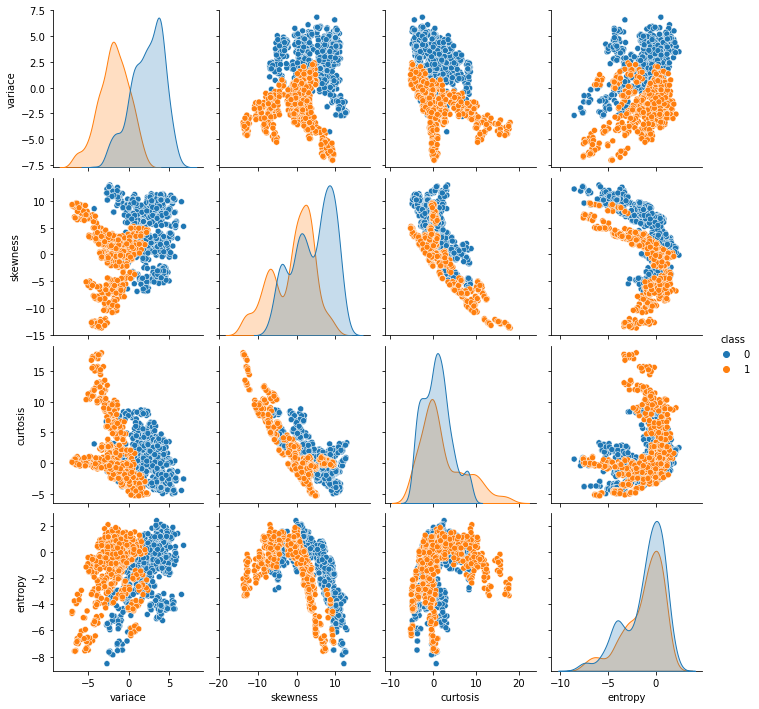

In [8]:
sns.pairplot(df, hue='class')

In [10]:
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Create a sequential model
model = Sequential()

# Add a dense layer 
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

# Compile your model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Display a summary of your model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Train your model for 20 epochs
model.fit(X_train, y_train, epochs = 20)

# Evaluate your model accuracy on the test set
accuracy = model.evaluate(X_test, y_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

Epoch 1/20
35/35 [==============================] - 10s 787us/step - loss: 0.6194 - accuracy: 0.7071
Epoch 2/20
35/35 [==============================] - 0s 694us/step - loss: 0.3496 - accuracy: 0.8073
Epoch 3/20
35/35 [==============================] - 0s 721us/step - loss: 0.2603 - accuracy: 0.8771
Epoch 4/20
35/35 [==============================] - 0s 665us/step - loss: 0.2463 - accuracy: 0.8945
Epoch 5/20
35/35 [==============================] - 0s 701us/step - loss: 0.2017 - accuracy: 0.9131
Epoch 6/20
35/35 [==============================] - 0s 718us/step - loss: 0.1858 - accuracy: 0.9331
Epoch 7/20
35/35 [==============================] - 0s 929us/step - loss: 0.1599 - accuracy: 0.9468
Epoch 8/20
35/35 [==============================] - 0s 715us/step - loss: 0.1600 - accuracy: 0.9488
Epoch 9/20
35/35 [==============================] - 0s 642us/step - loss: 0.1549 - accuracy: 0.9448
Epoch 10/20
35/35 [==============================] - 0s 681us/step - loss: 0.1436 - accuracy: 0.955

## 2. NN in Multi-class Classification

In [33]:
darts = pd.read_csv("darts.csv")

darts.head()

,xCoord,yCoord,competitor
0,0.196451,-0.520341,Steve
1,0.476027,-0.306763,Susan
2,0.003175,-0.980736,Michael
3,0.294078,0.267566,Kate
4,-0.051120,0.598946,Steve


In [34]:
darts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   xCoord      800 non-null    float64
 1   yCoord      800 non-null    float64
 2   competitor  800 non-null    object 
dtypes: float64(2), object(1)
memory usage: 18.9+ KB


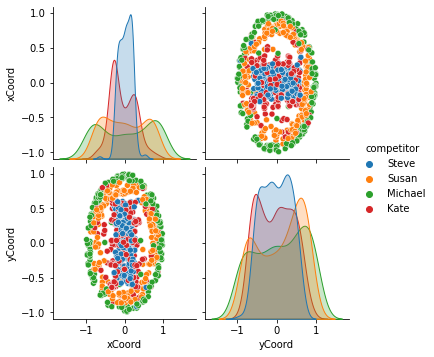

In [35]:
sns.pairplot(darts, hue='competitor')

In [36]:
# Instantiate a sequential model
model = Sequential()
  
# Add 3 dense layers of 128, 64 and 32 neurons each
model.add(Dense(128, input_shape=(2,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
  
# Add a dense layer with as many neurons as competitors. 
# Softmax activation function = output neurons produce probability of class and their sum is 1
model.add(Dense(4, activation='softmax'))
  
# Compile your model using categorical_crossentropy loss
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [37]:
model.summary(
)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               384       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 132       
Total params: 10,852
Trainable params: 10,852
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Transform into a categorical variable
darts['target'] = pd.Categorical(darts['competitor'])

# Assign a number to each category (label encoding)
darts['target'] = darts['target'].cat.codes 

darts.head()

,xCoord,yCoord,competitor,target
0,0.196451,-0.520341,Steve,2
1,0.476027,-0.306763,Susan,3
2,0.003175,-0.980736,Michael,1
3,0.294078,0.267566,Kate,0
4,-0.051120,0.598946,Steve,2


In [39]:
# Import to_categorical from keras utils module
from tensorflow.keras.utils import to_categorical

X = darts.drop(['competitor', 'target'], axis=1)
# Use to_categorical on your labels
y = to_categorical(darts['target'])

# Now print the one-hot encoded labels
print('One-hot encoded competitors: \n',y)

One-hot encoded competitors: 
 [[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Fit your model to the training data for 200 epochs
model.fit(X_train, y_train, epochs=200)

# Evaluate your model accuracy on the test data
accuracy = model.evaluate(X_test, y_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

Epoch 1/200
20/20 [==============================] - 1s 1ms/step - loss: 1.3789 - accuracy: 0.2479
Epoch 2/200
20/20 [==============================] - 0s 906us/step - loss: 1.3326 - accuracy: 0.3347
Epoch 3/200
20/20 [==============================] - 0s 1ms/step - loss: 1.2746 - accuracy: 0.4442
Epoch 4/200
20/20 [==============================] - 0s 1ms/step - loss: 1.1965 - accuracy: 0.5032
Epoch 5/200
20/20 [==============================] - 0s 1ms/step - loss: 1.0817 - accuracy: 0.5733
Epoch 6/200
20/20 [==============================] - 0s 1ms/step - loss: 0.9738 - accuracy: 0.5980
Epoch 7/200
20/20 [==============================] - 0s 1ms/step - loss: 0.9022 - accuracy: 0.6147
Epoch 8/200
20/20 [==============================] - 0s 979us/step - loss: 0.8856 - accuracy: 0.5769
Epoch 9/200
20/20 [==============================] - 0s 1ms/step - loss: 0.8473 - accuracy: 0.6256
Epoch 10/200
20/20 [==============================] - 0s 992us/step - loss: 0.7987 - accuracy: 0.6457
Epo

20/20 [==============================] - 0s 976us/step - loss: 0.5362 - accuracy: 0.8063
Epoch 82/200
20/20 [==============================] - 0s 1ms/step - loss: 0.5206 - accuracy: 0.8344
Epoch 83/200
20/20 [==============================] - 0s 912us/step - loss: 0.5475 - accuracy: 0.7921
Epoch 84/200
20/20 [==============================] - 0s 874us/step - loss: 0.5425 - accuracy: 0.7978
Epoch 85/200
20/20 [==============================] - 0s 875us/step - loss: 0.5262 - accuracy: 0.8167
Epoch 86/200
20/20 [==============================] - 0s 827us/step - loss: 0.5202 - accuracy: 0.8134
Epoch 87/200
20/20 [==============================] - 0s 841us/step - loss: 0.5351 - accuracy: 0.7916
Epoch 88/200
20/20 [==============================] - 0s 942us/step - loss: 0.5242 - accuracy: 0.8206
Epoch 89/200
20/20 [==============================] - 0s 951us/step - loss: 0.4879 - accuracy: 0.8297
Epoch 90/200
20/20 [==============================] - 0s 884us/step - loss: 0.5488 - accuracy: 0.

20/20 [==============================] - 0s 903us/step - loss: 0.4975 - accuracy: 0.8247
Epoch 161/200
20/20 [==============================] - 0s 905us/step - loss: 0.4937 - accuracy: 0.8163
Epoch 162/200
20/20 [==============================] - 0s 822us/step - loss: 0.5349 - accuracy: 0.7987
Epoch 163/200
20/20 [==============================] - 0s 873us/step - loss: 0.5272 - accuracy: 0.7957
Epoch 164/200
20/20 [==============================] - 0s 906us/step - loss: 0.5036 - accuracy: 0.8178
Epoch 165/200
20/20 [==============================] - 0s 905us/step - loss: 0.4674 - accuracy: 0.8268
Epoch 166/200
20/20 [==============================] - 0s 875us/step - loss: 0.5347 - accuracy: 0.8034
Epoch 167/200
20/20 [==============================] - 0s 868us/step - loss: 0.4845 - accuracy: 0.8317
Epoch 168/200
20/20 [==============================] - 0s 1ms/step - loss: 0.4665 - accuracy: 0.8417
Epoch 169/200
20/20 [==============================] - 0s 921us/step - loss: 0.5740 - acc

In [43]:
sample_X_test = X_test[:10]
sample_y_test = y_test[:10]

sample_X_test, sample_y_test

(       xCoord    yCoord
 696  0.218128 -0.233525
 667  0.058994 -0.982715
 63  -0.256676 -0.024401
 533  0.094178 -0.537036
 66   0.072403 -0.038425
 621  0.881089  0.113357
 346 -0.873209  0.415050
 490 -0.054301  0.987727
 760 -0.084833 -0.863341
 456 -0.904365 -0.190065,
 array([[0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [0., 1., 0., 0.]], dtype=float32))

In [48]:
# Predict on X_test sample
preds = model.predict(sample_X_test)

# Print preds vs true values
print("{} | {}".format('Raw Model Predictions','True labels'))
for i,pred in enumerate(preds):
  print("{} | {}".format(pred,sample_y_test[i]))

# Extract the position of highest probability from each pred vector
preds_chosen = [np.argmax(pred) for pred in preds]

# Print preds vs true values
print("{} | {}".format('Rounded Model Predictions','True labels'))
for i,pred in enumerate(preds_chosen):
  print("{} | {}".format(pred,sample_y_test[i]))

Raw Model Predictions | True labels
[0.27848253 0.01795395 0.6908342  0.01272927] | [0. 0. 1. 0.]
[9.5593062e-04 9.9653876e-01 2.4776375e-03 2.7635799e-05] | [0. 1. 0. 0.]
[0.6369372  0.02579741 0.33107442 0.00619096] | [1. 0. 0. 0.]
[0.15129596 0.01975956 0.8146036  0.01434091] | [1. 0. 0. 0.]
[0.2601581  0.01047643 0.72208446 0.00728097] | [0. 0. 0. 1.]
[2.3418657e-02 1.3855420e-01 1.7556503e-04 8.3785158e-01] | [0. 0. 0. 1.]
[0.00362897 0.9920332  0.0014311  0.00290676] | [0. 1. 0. 0.]
[1.9392930e-04 9.9847680e-01 1.2611304e-03 6.8186433e-05] | [0. 1. 0. 0.]
[0.07443257 0.0922641  0.03600732 0.797296  ] | [0. 0. 0. 1.]
[2.53540929e-04 9.93784308e-01 1.08158674e-04 5.85403573e-03] | [0. 1. 0. 0.]
Rounded Model Predictions | True labels
2 | [0. 0. 1. 0.]
1 | [0. 1. 0. 0.]
0 | [1. 0. 0. 0.]
2 | [1. 0. 0. 0.]
2 | [0. 0. 0. 1.]
3 | [0. 0. 0. 1.]
1 | [0. 1. 0. 0.]
1 | [0. 1. 0. 0.]
3 | [0. 0. 0. 1.]
1 | [0. 1. 0. 0.]


## 3. Using Keras Callbacks 

In [87]:
# recreate model for the darts dataset

# Instantiate a sequential model
model = Sequential()
  
# Add 3 dense layers of 128, 64 and 32 neurons each
model.add(Dense(128, input_shape=(2,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
  
# Add a dense layer with as many neurons as competitors. 
# Softmax activation function = output neurons produce probability of class and their sum is 1
model.add(Dense(4, activation='softmax'))
  
# Compile your model using categorical_crossentropy loss
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [88]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 128)               384       
_________________________________________________________________
dense_66 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_67 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_68 (Dense)             (None, 4)                 132       
Total params: 10,852
Trainable params: 10,852
Non-trainable params: 0
_________________________________________________________________


In [89]:
# define plotting functions for loss and accuracy

def plot_loss(loss,val_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()
    
def plot_accuracy(acc,val_acc):
  plt.figure()
  plt.plot(acc)
  plt.plot(val_acc)
  plt.title('Model Acc')
  plt.ylabel('Acc')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()

Epoch 1/200
20/20 [==============================] - 1s 14ms/step - loss: 1.3816 - accuracy: 0.2731 - val_loss: 1.3516 - val_accuracy: 0.3750
Epoch 2/200
20/20 [==============================] - 0s 2ms/step - loss: 1.3412 - accuracy: 0.3952 - val_loss: 1.3049 - val_accuracy: 0.3938
Epoch 3/200
20/20 [==============================] - 0s 2ms/step - loss: 1.2919 - accuracy: 0.4666 - val_loss: 1.2369 - val_accuracy: 0.4625
Epoch 4/200
20/20 [==============================] - 0s 2ms/step - loss: 1.1897 - accuracy: 0.5055 - val_loss: 1.1530 - val_accuracy: 0.4688
Epoch 5/200
20/20 [==============================] - 0s 2ms/step - loss: 1.0819 - accuracy: 0.5384 - val_loss: 1.0512 - val_accuracy: 0.4625
Epoch 6/200
20/20 [==============================] - 0s 2ms/step - loss: 0.9961 - accuracy: 0.5554 - val_loss: 0.9789 - val_accuracy: 0.4875
Epoch 7/200
20/20 [==============================] - 0s 2ms/step - loss: 0.8844 - accuracy: 0.6086 - val_loss: 0.9392 - val_accuracy: 0.4875
Epoch 8/200


Epoch 59/200
20/20 [==============================] - 0s 2ms/step - loss: 0.5579 - accuracy: 0.8168 - val_loss: 0.6328 - val_accuracy: 0.7750
Epoch 60/200
20/20 [==============================] - 0s 2ms/step - loss: 0.5098 - accuracy: 0.8546 - val_loss: 0.6137 - val_accuracy: 0.7875
Epoch 61/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6115 - accuracy: 0.7620 - val_loss: 0.6228 - val_accuracy: 0.7937
Epoch 62/200
20/20 [==============================] - 0s 2ms/step - loss: 0.5421 - accuracy: 0.8168 - val_loss: 0.6220 - val_accuracy: 0.7812
Epoch 63/200
20/20 [==============================] - 0s 2ms/step - loss: 0.5317 - accuracy: 0.8045 - val_loss: 0.6392 - val_accuracy: 0.7812
Epoch 64/200
20/20 [==============================] - 0s 2ms/step - loss: 0.5006 - accuracy: 0.8325 - val_loss: 0.6338 - val_accuracy: 0.7875
Epoch 65/200
20/20 [==============================] - 0s 2ms/step - loss: 0.5914 - accuracy: 0.8022 - val_loss: 0.6227 - val_accuracy: 0.7875
Epoch 

20/20 [==============================] - 0s 2ms/step - loss: 0.4799 - accuracy: 0.8215 - val_loss: 0.6450 - val_accuracy: 0.8000
Epoch 117/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4754 - accuracy: 0.8346 - val_loss: 0.6138 - val_accuracy: 0.7937
Epoch 118/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4847 - accuracy: 0.8369 - val_loss: 0.6031 - val_accuracy: 0.8188
Epoch 119/200
20/20 [==============================] - 0s 2ms/step - loss: 0.5469 - accuracy: 0.8020 - val_loss: 0.6422 - val_accuracy: 0.8062
Epoch 120/200
20/20 [==============================] - 0s 2ms/step - loss: 0.5406 - accuracy: 0.7822 - val_loss: 0.6606 - val_accuracy: 0.7875
Epoch 121/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4953 - accuracy: 0.8134 - val_loss: 0.6215 - val_accuracy: 0.8000
Epoch 122/200
20/20 [==============================] - 0s 2ms/step - loss: 0.5153 - accuracy: 0.8083 - val_loss: 0.6278 - val_accuracy: 0.8000
Epoch 123/200

20/20 [==============================] - 0s 2ms/step - loss: 0.4846 - accuracy: 0.8129 - val_loss: 0.6416 - val_accuracy: 0.8000
Epoch 174/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4967 - accuracy: 0.8103 - val_loss: 0.6707 - val_accuracy: 0.7688
Epoch 175/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4685 - accuracy: 0.8366 - val_loss: 0.6289 - val_accuracy: 0.8125
Epoch 176/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4799 - accuracy: 0.8224 - val_loss: 0.6358 - val_accuracy: 0.7875
Epoch 177/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4405 - accuracy: 0.8372 - val_loss: 0.6189 - val_accuracy: 0.8062
Epoch 178/200
20/20 [==============================] - 0s 2ms/step - loss: 0.5355 - accuracy: 0.8061 - val_loss: 0.6608 - val_accuracy: 0.7688
Epoch 179/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4724 - accuracy: 0.8117 - val_loss: 0.6430 - val_accuracy: 0.7937
Epoch 180/200

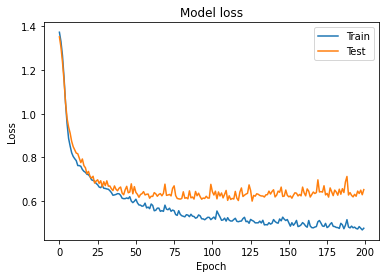

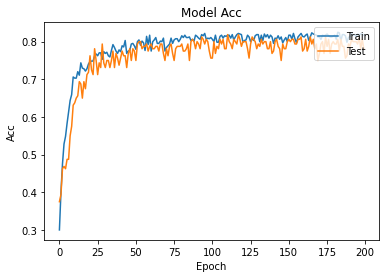

In [90]:
# Train your model and save its history
h_callback = model.fit(X_train, y_train, epochs = 200,
               validation_data=(X_test, y_test))

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

# Plot train vs test accuracy during training
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])

In [91]:
# Evaluate your model accuracy on the test data
accuracy = model.evaluate(X_test, y_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

5/5 [==============================] - 0s 1ms/step - loss: 0.6531 - accuracy: 0.7812
Accuracy: 0.78125


In [92]:
# Instantiate a sequential model
model = Sequential()
  
# Add 3 dense layers of 128, 64 and 32 neurons each
model.add(Dense(128, input_shape=(2,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
  
# Add a dense layer with as many neurons as competitors. 
# Softmax activation function = output neurons produce probability of class and their sum is 1
model.add(Dense(4, activation='softmax'))
  
# Compile your model using categorical_crossentropy loss
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [93]:
# Import the early stopping callback
from keras.callbacks import EarlyStopping

# Define a callback to monitor val_acc
monitor_val_acc = EarlyStopping(monitor='val_accuracy', 
                       patience=5)

# Train your model using the early stopping callback
model.fit(X_train, y_train, 
           epochs=1000, validation_data=(X_test, y_test),
           callbacks= [monitor_val_acc])

Epoch 1/1000
20/20 [==============================] - 3s 15ms/step - loss: 1.3795 - accuracy: 0.2897 - val_loss: 1.3387 - val_accuracy: 0.3250
Epoch 2/1000
20/20 [==============================] - 0s 2ms/step - loss: 1.3358 - accuracy: 0.3035 - val_loss: 1.2745 - val_accuracy: 0.4313
Epoch 3/1000
20/20 [==============================] - 0s 2ms/step - loss: 1.2593 - accuracy: 0.4784 - val_loss: 1.1954 - val_accuracy: 0.4250
Epoch 4/1000
20/20 [==============================] - 0s 2ms/step - loss: 1.1495 - accuracy: 0.5569 - val_loss: 1.0965 - val_accuracy: 0.4812
Epoch 5/1000
20/20 [==============================] - 0s 2ms/step - loss: 1.0368 - accuracy: 0.5563 - val_loss: 1.0247 - val_accuracy: 0.4688
Epoch 6/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.9399 - accuracy: 0.6059 - val_loss: 0.9570 - val_accuracy: 0.4750
Epoch 7/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.8572 - accuracy: 0.6243 - val_loss: 0.9110 - val_accuracy: 0.5375
Epoch

In [94]:
# Instantiate a sequential model
model = Sequential()
  
# Add 3 dense layers of 128, 64 and 32 neurons each
model.add(Dense(128, input_shape=(2,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
  
# Add a dense layer with as many neurons as competitors. 
# Softmax activation function = output neurons produce probability of class and their sum is 1
model.add(Dense(4, activation='softmax'))
  
# Compile your model using categorical_crossentropy loss
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [95]:
# we can also add a checkpoint callback to save the best model in terms of the monitored metric

# Import the EarlyStopping and ModelCheckpoint callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Early stop on validation accuracy
monitor_val_acc = EarlyStopping(monitor = 'val_accuracy', patience = 5)

# Save the best model as best_banknote_model.hdf5
modelCheckpoint = ModelCheckpoint('best_darts_model.hdf5', save_best_only = True)

# Fit your model for a stupid amount of epochs
h_callback = model.fit(X_train, y_train,
                    epochs = 1000,
                    callbacks = [monitor_val_acc, modelCheckpoint],
                    validation_data = (X_test, y_test))

Epoch 1/1000
20/20 [==============================] - 1s 14ms/step - loss: 1.3820 - accuracy: 0.2480 - val_loss: 1.3527 - val_accuracy: 0.2375
Epoch 2/1000
20/20 [==============================] - 0s 2ms/step - loss: 1.3427 - accuracy: 0.2892 - val_loss: 1.3094 - val_accuracy: 0.2812
Epoch 3/1000
20/20 [==============================] - 0s 2ms/step - loss: 1.2929 - accuracy: 0.3856 - val_loss: 1.2503 - val_accuracy: 0.4563
Epoch 4/1000
20/20 [==============================] - 0s 2ms/step - loss: 1.2142 - accuracy: 0.5270 - val_loss: 1.1658 - val_accuracy: 0.4250
Epoch 5/1000
20/20 [==============================] - 0s 2ms/step - loss: 1.0989 - accuracy: 0.5448 - val_loss: 1.0771 - val_accuracy: 0.4750
Epoch 6/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.9947 - accuracy: 0.5734 - val_loss: 1.0030 - val_accuracy: 0.4625
Epoch 7/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.9166 - accuracy: 0.5886 - val_loss: 0.9517 - val_accuracy: 0.4938
Epoch